<a href="https://colab.research.google.com/github/lydia-r/Data-110/blob/main/Assignment/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/lydia-r/Data-110/refs/heads/main/Dataset/Daily_Arrests_20241118.csv')# read the file

In [4]:
theft_df= data[data['OFFENSE'].str.contains('theft', case=False, na=False)] # filtering the theft from the offense types.

In [19]:
theft_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 12 to 401
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    81 non-null     object
 1   FIRST NAME   81 non-null     object
 2   MIDDLE NAME  61 non-null     object
 3   AGE          81 non-null     int64 
 4   STREET       81 non-null     object
 5   CITY         81 non-null     object
 6   STATE        81 non-null     object
 7   ARREST DATE  81 non-null     object
 8   OFFENSE      81 non-null     object
dtypes: int64(1), object(8)
memory usage: 8.4+ KB


In [75]:
theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE,DAY_OF_WEEK,Age Group
12,VEST,ZAND,GILBERT,50,NO FIXED ADDRESS,BETHESDA,MD,2024-10-21,"THEFT: $100 TO UNDER $1,500",Monday,51-60
13,PRINGLE,AARION,NaN,26,4900 Block Of C ST,Washington D.C.,DC,2024-10-21,"THEFT: $100 TO UNDER $1,500",Monday,21-30
17,ORDONEZ,ISRAEL,DE JESUS,25,8700 Block Of carroll ave,SILVER SPRING,MD,2024-10-21,"THEFT: $100 TO UNDER $1,500",Monday,21-30
18,WRIGHT,BRANDI,MARIE,43,NO FIXED ADDRESS,ROCKVILLE,MD,2024-10-21,"THEFT: $1,500 TO UNDER $25,000",Monday,41-50
24,DICKERSON,STEVEN,SIMS,37,8800 Block Of PLYMONTH ST,SILVER SPRING,MD,2024-10-22,"THEFT: $100 TO UNDER $1,500",Tuesday,31-40


2. **Exploratory Data Analysis (EDA)**
  

In [9]:
# Total number of theft incident
total_theft_incidents = len(theft_df)
total_theft_incidents=theft_df['OFFENSE'].count()
print(f'Total number of theft incidents:', total_theft_incidents)

Total number of theft incidents: 81


In [15]:
#Range of age involved in theft offenses
min_age= theft_df['AGE'].min()
max_age= theft_df['AGE'].max()
print(f'Range of age involved in theft offenses is between',min_age,'and',max_age)

Range of age involved in theft offenses is between 18 and 69


3. **Visualizing Theft Offenses by Day of the Week**

<ipython-input-45-65f82fa64c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['ARREST DATE']=pd.to_datetime(theft_df['ARREST DATE'])
<ipython-input-45-65f82fa64c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['DAY_OF_WEEK']=theft_df['ARREST DATE'].dt.day_name()


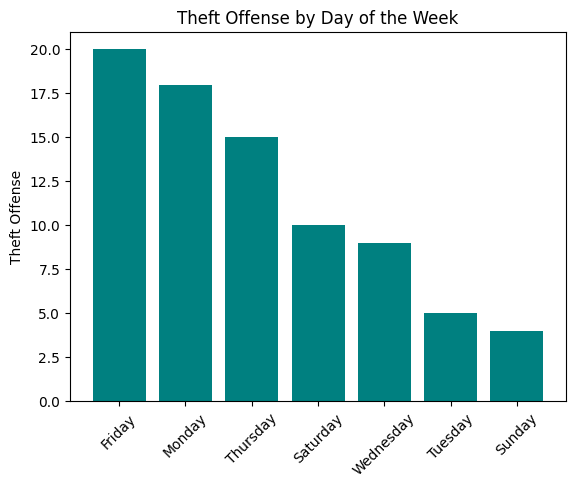

In [45]:
theft_df['ARREST DATE']=pd.to_datetime(theft_df['ARREST DATE']) # changing the arrest from object to date
theft_df['DAY_OF_WEEK']=theft_df['ARREST DATE'].dt.day_name() # filtering the days of the week
day_of_week = theft_df['DAY_OF_WEEK'].value_counts()

plt.bar(day_of_week.index,day_of_week.values, color='teal')
plt.ylabel('Theft Offense')
plt.xticks(rotation=45)
plt.title('Theft Offense by Day of the Week')
plt.show()

<ipython-input-47-92c3d37343a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_df['Age Group'] = pd.cut(theft_df['AGE'], bins= bins, labels=bin_interval, right=False)


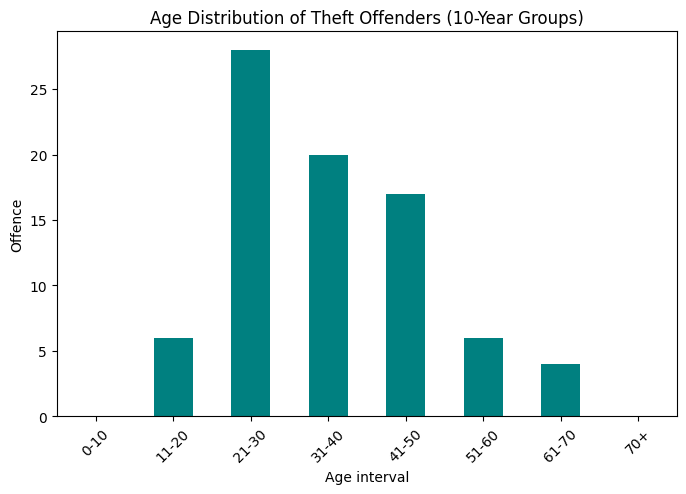

In [47]:

bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
bin_interval = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']

# Grouping the ages into these intervals
theft_df['Age Group'] = pd.cut(theft_df['AGE'], bins= bins, labels=bin_interval, right=False)

# Counting offenders in each age group
age_group_counts = theft_df['Age Group'].value_counts().sort_index()

# Plotting the age distribution
age_group_counts.plot(kind='bar', figsize=(8, 5),color= 'teal')
plt.title('Age Distribution of Theft Offenders (10-Year Groups)')
plt.xlabel('Age interval')
plt.ylabel('Offence')
plt.xticks(rotation=45)
plt.show()

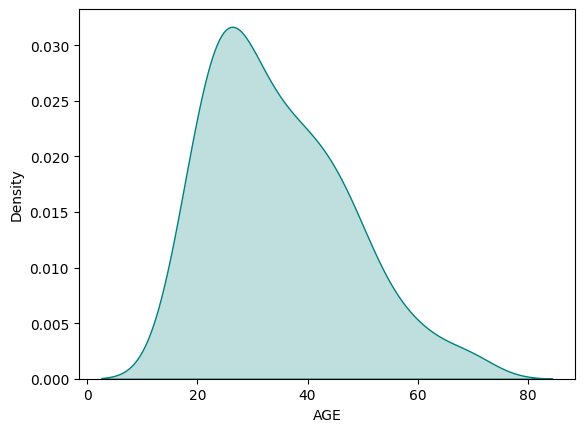

In [55]:
sns.kdeplot(theft_df['AGE'], fill=True, color='teal')
plt.show()


5. **Offense Analysis**

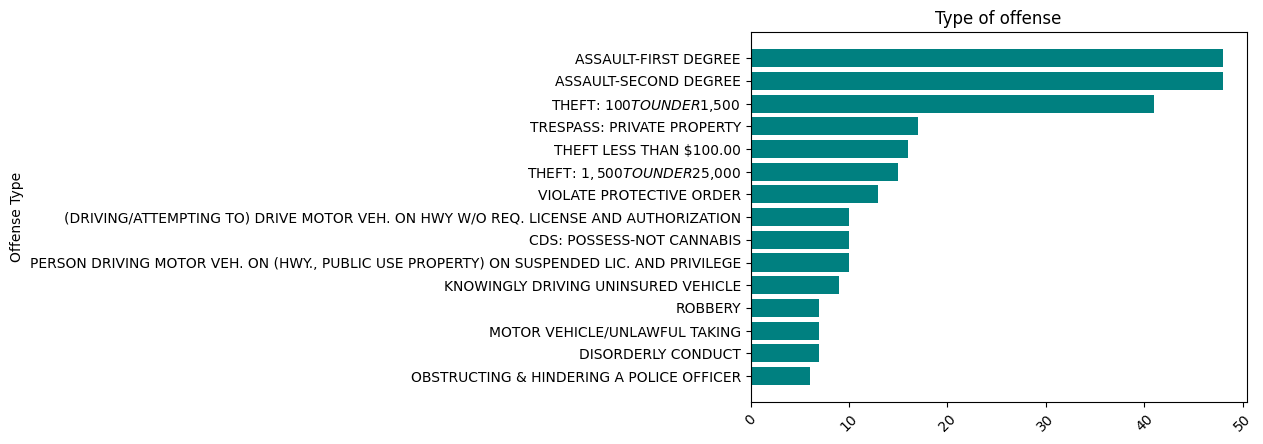

In [46]:
Offense=data['OFFENSE'].value_counts().head(15).sort_values(ascending=True)
plt.barh(Offense.index,Offense.values, color='teal')
plt.ylabel('Offense Type')
plt.xticks(rotation=45)
plt.title('Type of offense')
plt.show()

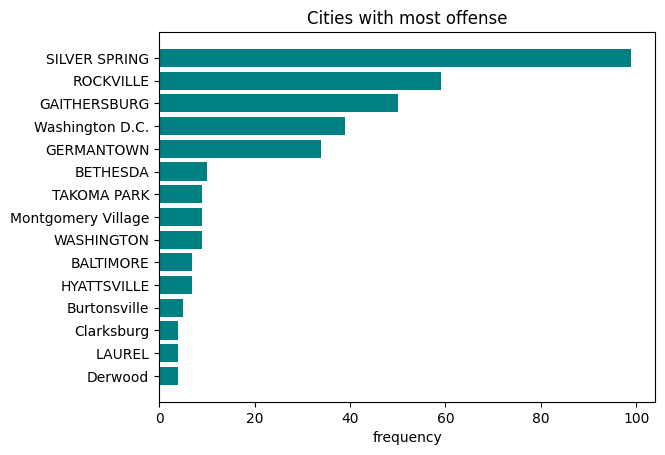

In [58]:
city=data['CITY'].value_counts().head(15).sort_values(ascending=True)
plt.barh(city.index,city.values, color='teal')
plt.xlabel('frequency')
plt.title('Cities with most offense')
plt.show()

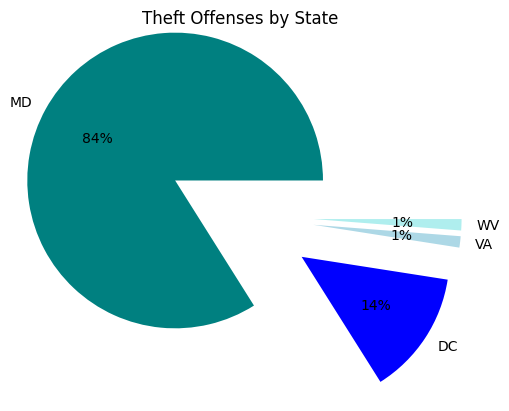

In [22]:
theft_state = theft_df['STATE'].value_counts()
explode = (0.5, 0.5, 0.5, 0.5)  # Explode all slices
colors = ['teal', 'blue', 'lightblue', 'paleturquoise']  # Custom colors
plt.pie(
    theft_state.values,
    labels=theft_state.index,
    autopct='%1.0f%%',
    explode=explode,
    colors=colors,
)
plt.title('Theft Offenses by State')
plt.show()